In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.impute import SimpleImputer
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.api import VAR
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Setting display options
pd.set_option('display.max_columns', None)
sns.set_theme()
warnings.simplefilter('ignore')

In [2]:
# Datataset importation for exploration purposes
Q1 = pd.read_csv('Questionnaire_datasetIA.csv', encoding = 'latin-1')
Q2 = pd.read_csv('Questionnaire_datasetIB.csv', encoding = 'latin-1')
test = pd.read_csv('test_set.csv')
ctrl = pd.read_csv('control_set.csv')

# Exploring, Cleaning and Pre-processing the Questionnaire data



In [21]:
Q1.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,It affects me very much when one of my friends seems upset.,"I often get deeply involved with the feelings of a character in a film, play or novel.",I get very upset when I see someone cry.,I am happy when I am with a cheerful group and sad when the others are glum.,It worries me when others are worrying and panicky.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,It is hard for me to see why some things upset people so much.,I find it easy to put myself in somebody elses shoes.,I am good at predicting how someone will feel.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,"I can sense if I am intruding, even if the other person does not tell me.",I can easily work out what another person might want to talk about.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,"I can usually appreciate the other persons viewpoint, even if I do not agree with it.",I usually stay emotionally detached when watching a film.,I always try to consider the other fellows feelings before I do something.,Before I do something I try to consider how my friends will react to it.,I feel frustrated when I cannot communicate my ideas.,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended_Q1,Total Score original_Q1,Elapsed time
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3,3,4,4,3,4,3,3,2,3,3,4,4,3,3,4,3,4,4,4,4,4,4,4,3,3,3,4,3,4,4,4,4,1,4,4,4,1,3,4,134,108,5 minutes 5 seconds
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3,3,4,4,4,3,3,2,3,3,1,3,4,4,4,3,3,4,4,3,4,4,4,3,3,4,3,4,3,4,4,3,4,2,4,3,3,4,2,2,133,105,5 minutes 55 seconds
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2,2,3,4,3,3,3,3,3,3,4,4,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,2,3,3,3,3,3,3,3,116,81,6 minutes 49 seconds
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proce

In [22]:
Q2.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,It affects me very much when one of my friends seems upset.,"I often get deeply involved with the feelings of a character in a film, play or novel.",I get very upset when I see someone cry.,I am happy when I am with a cheerful group and sad when the others are glum.,It worries me when others are worrying and panicky.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,It is hard for me to see why some things upset people so much.,I find it easy to put myself in somebody elses shoes.,I am good at predicting how someone will feel.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,"I can sense if I am intruding, even if the other person does not tell me.",I can easily work out what another person might want to talk about.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,"I can usually appreciate the other persons viewpoint, even if I do not agree with it.",I usually stay emotionally detached when watching a film.,I always try to consider the other fellows feelings before I do something.,Before I do something I try to consider how my friends will react to it.,I feel frustrated when I cannot communicate my ideas.,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended_Q2,Total Score original_Q2,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,4,4,4,3,3,4,3,3,4,4,3,3,3,4,4,4,4,4,4,4,3,3,3,4,3,4,4,4,4,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,4,4,3,3,4,4,2,3,3,3,3,3,3,3,3,3,4,3,4,3,3,3,3,4,3,4,3,3,4,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,4,4,4,3,3,3,3,4,4,3,3,3,3,4,3,3,3,3,3,3,2,2,2,4,3,3,3,4,2,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proce

In [23]:
# Renaming the columns 'Total Score extended' and 'Total Score original' to 'Total Score extended_Q1'and 'Total Score original_Q1' respectively in Q1 for eventual arithmetic operation
Q1.rename(columns={'Total Score extended': 'Total Score extended_Q1'}, inplace=True)
Q1.rename(columns={'Total Score original': 'Total Score original_Q1'}, inplace=True)
Q1.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,It affects me very much when one of my friends seems upset.,"I often get deeply involved with the feelings of a character in a film, play or novel.",I get very upset when I see someone cry.,I am happy when I am with a cheerful group and sad when the others are glum.,It worries me when others are worrying and panicky.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,It is hard for me to see why some things upset people so much.,I find it easy to put myself in somebody elses shoes.,I am good at predicting how someone will feel.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,"I can sense if I am intruding, even if the other person does not tell me.",I can easily work out what another person might want to talk about.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,"I can usually appreciate the other persons viewpoint, even if I do not agree with it.",I usually stay emotionally detached when watching a film.,I always try to consider the other fellows feelings before I do something.,Before I do something I try to consider how my friends will react to it.,I feel frustrated when I cannot communicate my ideas.,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended_Q1,Total Score original_Q1,Elapsed time
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3,3,4,4,3,4,3,3,2,3,3,4,4,3,3,4,3,4,4,4,4,4,4,4,3,3,3,4,3,4,4,4,4,1,4,4,4,1,3,4,134,108,5 minutes 5 seconds
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3,3,4,4,4,3,3,2,3,3,1,3,4,4,4,3,3,4,4,3,4,4,4,3,3,4,3,4,3,4,4,3,4,2,4,3,3,4,2,2,133,105,5 minutes 55 seconds
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2,2,3,4,3,3,3,3,3,3,4,4,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,2,3,3,3,3,3,3,3,116,81,6 minutes 49 seconds
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proce

In [24]:
# Renaming the columns 'Total Score extended' and 'Total Score original' to 'Total Score extended_Q2'and 'Total Score original_Q2' respectively in Q2 for eventual arithmetic operation
Q2.rename(columns={'Total Score extended': 'Total Score extended_Q2'}, inplace=True)
Q2.rename(columns={'Total Score original': 'Total Score original_Q2'}, inplace=True)
Q2.head()


,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,It affects me very much when one of my friends seems upset.,"I often get deeply involved with the feelings of a character in a film, play or novel.",I get very upset when I see someone cry.,I am happy when I am with a cheerful group and sad when the others are glum.,It worries me when others are worrying and panicky.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,It is hard for me to see why some things upset people so much.,I find it easy to put myself in somebody elses shoes.,I am good at predicting how someone will feel.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,"I can sense if I am intruding, even if the other person does not tell me.",I can easily work out what another person might want to talk about.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,"I can usually appreciate the other persons viewpoint, even if I do not agree with it.",I usually stay emotionally detached when watching a film.,I always try to consider the other fellows feelings before I do something.,Before I do something I try to consider how my friends will react to it.,I feel frustrated when I cannot communicate my ideas.,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended_Q2,Total Score original_Q2,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,4,4,4,3,3,4,3,3,4,4,3,3,3,4,4,4,4,4,4,4,3,3,3,4,3,4,4,4,4,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,4,4,3,3,4,4,2,3,3,3,3,3,3,3,3,3,4,3,4,3,3,3,3,4,3,4,3,3,4,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,4,4,4,3,3,3,3,4,4,3,3,3,3,4,3,3,3,3,3,3,2,2,2,4,3,3,3,4,2,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proce

In [25]:
# Concatenating Q1 (Questionaire A) to Q2 (Questionaire B) into one new data "Target" because both tables have Identical elements;
Target = pd.concat([Q1, Q2], axis=1)

# Then calculating  the average of the "Total Score extended_Q1" and "Total Score extended_Q2" respectively and adding it to a new column "Average_A"
Target['Average_A'] = (Target['Total Score extended_Q1'] + Target['Total Score extended_Q2']) / 2

# Then calculating  the average of the "Total Score extended_Q1" and "Total Score extended_Q2" respectively and adding it to a new column "Average_B"
Target['Average_B'] = (Target['Total Score original_Q1'] + Target['Total Score original_Q2']) / 2

Target = pd.DataFrame(Target)
# Printing the resulting table
#Target.info
Target.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,It affects me very much when one of my friends seems upset.,"I often get deeply involved with the feelings of a character in a film, play or novel.",I get very upset when I see someone cry.,I am happy when I am with a cheerful group and sad when the others are glum.,It worries me when others are worrying and panicky.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,It is hard for me to see why some things upset people so much.,I find it easy to put myself in somebody elses shoes.,I am good at predicting how someone will feel.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,"I can sense if I am intruding, even if the other person does not tell me.",I can easily work out what another person might want to talk about.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,"I can usually appreciate the other persons viewpoint, even if I do not agree with it.",I usually stay emotionally detached when watching a film.,I always try to consider the other fellows feelings before I do something.,Before I do something I try to consider how my friends will react to it.,I feel frustrated when I cannot communicate my ideas.,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended_Q1,Total Score original_Q1,Elapsed time,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from the

In [26]:
missing_values = Target.isnull().sum()
# Displaying the number of missing values for each column
print(missing_values)

Participant nr                                                                                                                                        0
NR                                                                                                                                                    0
Created                                                                                                                                               0
Modified                                                                                                                                              0
I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate    0
                                                                                                                                                     ..
Total Score extended_Q2                                                                 

In [27]:
all_missing = Target.isnull().all()
# Displaying columns where all values are missing
print(all_missing)

Participant nr                                                                                                                                        False
NR                                                                                                                                                    False
Created                                                                                                                                               False
Modified                                                                                                                                              False
I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate    False
                                                                                                                                                      ...  
Total Score extended_Q2                                         

In [28]:
# Checking if there are any missing values at all in the data
any_missing = Target.isnull().any()
# Displaying columns with missing values
print(any_missing)

Participant nr                                                                                                                                        False
NR                                                                                                                                                    False
Created                                                                                                                                               False
Modified                                                                                                                                              False
I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate    False
                                                                                                                                                      ...  
Total Score extended_Q2                                         

In [29]:
missing_values = Target.isna().sum()
# Displaying the number of missing values for each column
print(missing_values)

Participant nr                                                                                                                                        0
NR                                                                                                                                                    0
Created                                                                                                                                               0
Modified                                                                                                                                              0
I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate    0
                                                                                                                                                     ..
Total Score extended_Q2                                                                 

In [30]:
# Handling missing values by filling them with the mode
for col in Target.columns:
    mode_value = Target[col].mode().iloc[0]
    Target[col].fillna(mode_value, inplace=True)
Target.fillna(0, inplace=True)

# Then calculating  the average of the "Average_A" and "Average_" respectively and adding it to a new column "Average_score"
Target['Average_score'] = (Target['Average_A'] + Target['Average_B']) / 2
Target = pd.DataFrame(Target)
# Displaying the cleaned and preprocessed DataFrame
Target.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,It affects me very much when one of my friends seems upset.,"I often get deeply involved with the feelings of a character in a film, play or novel.",I get very upset when I see someone cry.,I am happy when I am with a cheerful group and sad when the others are glum.,It worries me when others are worrying and panicky.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,It is hard for me to see why some things upset people so much.,I find it easy to put myself in somebody elses shoes.,I am good at predicting how someone will feel.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,"I can sense if I am intruding, even if the other person does not tell me.",I can easily work out what another person might want to talk about.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,"I can usually appreciate the other persons viewpoint, even if I do not agree with it.",I usually stay emotionally detached when watching a film.,I always try to consider the other fellows feelings before I do something.,Before I do something I try to consider how my friends will react to it.,I feel frustrated when I cannot communicate my ideas.,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended_Q1,Total Score original_Q1,Elapsed time,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from the

In [31]:
Target = Target.T.drop_duplicates().T

In [32]:
# Mapping empathy scores from the questionnaire dataset () to the eye tracking
score_dic = dict(zip(Target['Participant nr'], Target['Average_score']))
score_dic

{1: 122.0,
 2: 116.25,
 3: 104.5,
 4: 106.25,
 5: 116.25,
 6: 106.75,
 7: 94.5,
 8: 94.0,
 9: 94.5,
 10: 93.75,
 11: 124.25,
 12: 109.75,
 13: 99.25,
 14: 114.75,
 15: 117.5,
 16: 99.25,
 17: 114.25,
 18: 108.75,
 19: 107.75,
 20: 119.5,
 21: 100.75,
 22: 105.5,
 23: 120.75,
 24: 112.25,
 25: 111.5,
 26: 101.5,
 27: 100.75,
 28: 104.5,
 29: 116.75,
 30: 89.5,
 31: 97.25,
 32: 90.75,
 33: 101.5,
 34: 84.25,
 35: 115.75,
 36: 90.0,
 37: 115.5,
 38: 82.5,
 39: 111.75,
 40: 92.25,
 41: 116.0,
 42: 101.5,
 43: 112.25,
 44: 93.5,
 45: 101.5,
 46: 84.75,
 47: 104.5,
 48: 98.75,
 49: 105.5,
 50: 89.5,
 51: 90.25,
 52: 83.0,
 53: 95.5,
 54: 92.0,
 55: 105.75,
 56: 88.25,
 57: 125.0,
 58: 89.25,
 59: 119.25,
 60: 89.75}

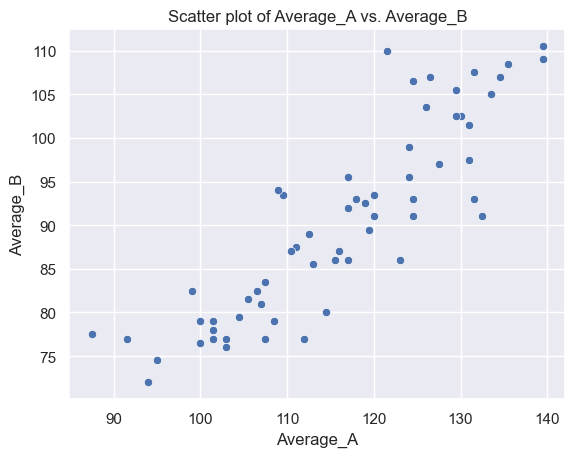

In [33]:
# Scatter plot to visualize the relationship between 'Average_A' and 'Average_B'
sns.scatterplot(x='Average_A', y='Average_B', data = Target)
plt.title('Scatter plot of Average_A vs. Average_B')
plt.show()

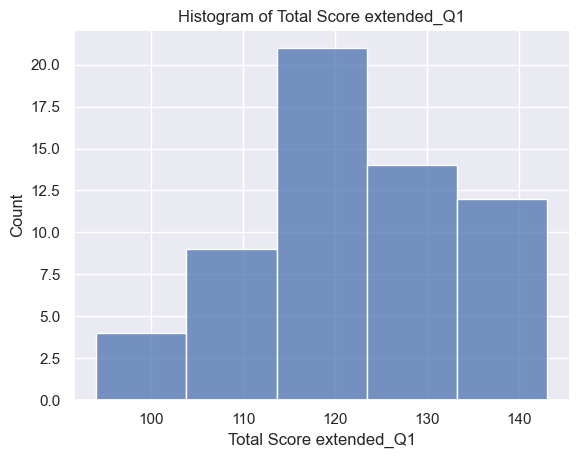

In [34]:
# Histogram to visualize the distribution of 'Total Score extended_Q1'
sns.histplot(data = Target, x='Total Score extended_Q1', bins=5)
plt.title('Histogram of Total Score extended_Q1')
plt.show()

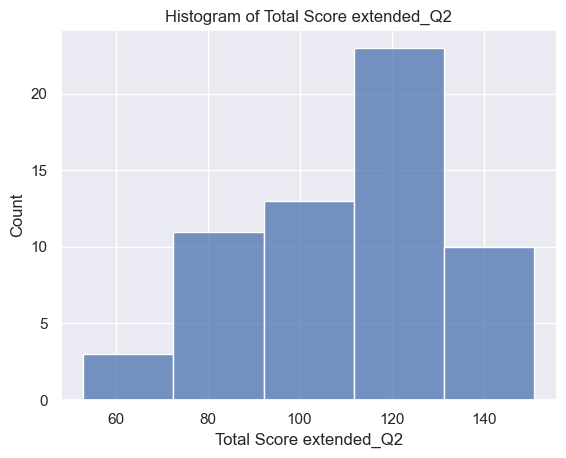

In [35]:
# Histogram to visualize the distribution of 'Total Score extended_Q2'
sns.histplot(data = Target, x='Total Score extended_Q2', bins=5)
plt.title('Histogram of Total Score extended_Q2')
plt.show()

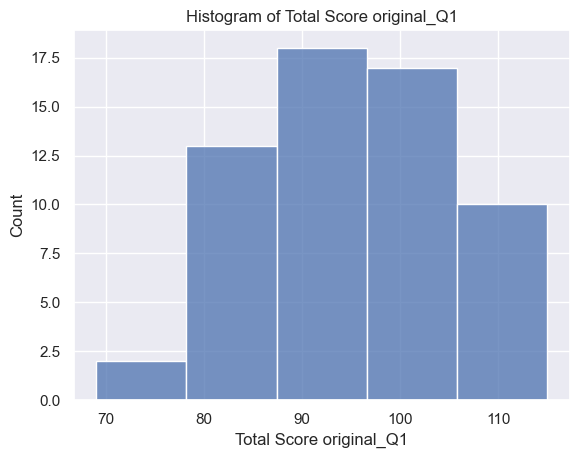

In [36]:
# Histogram to visualize the distribution of 'Total Score original_Q1'
sns.histplot(data = Target, x='Total Score original_Q1', bins=5)
plt.title('Histogram of Total Score original_Q1')
plt.show()

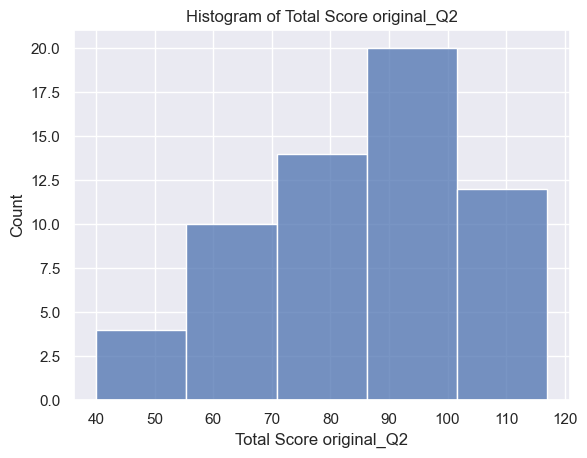

In [37]:
# Histogram to visualize the distribution of 'Total Score original_Q2'
sns.histplot(data = Target, x='Total Score original_Q2', bins=5)
plt.title('Histogram of Total Score original_Q2')
plt.show()

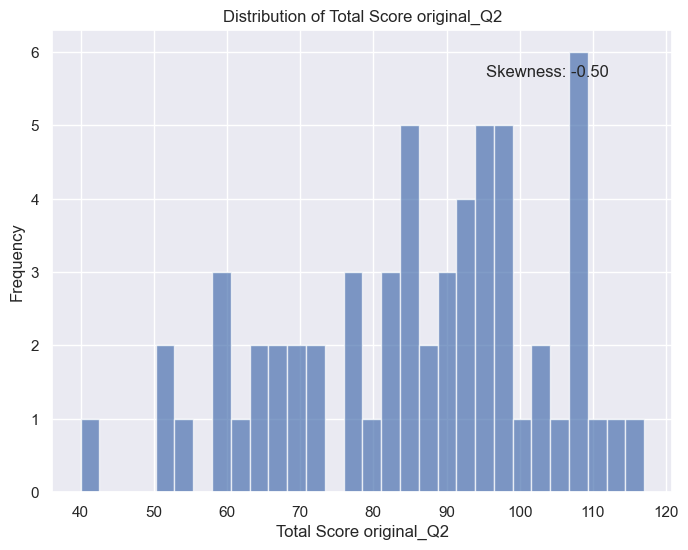

In [38]:
# Calculating the skewness of the column
skewness = Target['Total Score original_Q2'].skew()

# Creating a histogram to visualize the distribution of the column
plt.figure(figsize=(8, 6))
plt.hist(Target['Total Score original_Q2'], bins=30, alpha=0.7)
plt.xlabel('Total Score original_Q2')
plt.ylabel('Frequency')
plt.title('Distribution of Total Score original_Q2')
plt.grid(True)

# Adding skewness information to the plot
plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)

# Showing the plot
plt.show()

The graph above shows that the data is mostly distributed normally, but it also gives cues of the presence of outliers.


In the cell below is shown how the outliers are handled in the code:

1. Calculating the first quartile (Q1) and third quartile (Q3):
   - The `np.percentile()` function from the NumPy library is used to calculate the 25th percentile (Q1) and the 75th percentile (Q3) of the dataset `data`. These percentiles divide the data into four equal parts.

2. Calculating the Interquartile Range (IQR):
   - The IQR is the difference between the third quartile (Q3) and the first quartile (Q1). It represents the range of the middle 50% of the data.

3. Calculating the lower and upper bounds to identify outliers:
   - The lower bound is calculated by subtracting 1.5 times the IQR from Q1 (`lower_bound = Q1 - 1.5 * IQR`).
   - The upper bound is calculated by adding 1.5 times the IQR to Q3 (`upper_bound = Q3 + 1.5 * IQR`).
   - Any data point that falls below the lower bound or above the upper bound is considered an outlier.

4. Identifying and handling the outliers:
   - The `np.where()` function is used to find the indices of the elements in the `data` array that are outliers (i.e., values less than the lower bound or greater than the upper bound).
   - A copy of the original `data` array is created and stored in `data_cleaned`.
   - The outliers in the `data_cleaned` array are replaced with the median value of the entire `data` array using `np.median(data)`.

5. Returning the cleaned data:
   - The function `handle_outliers` returns the `data_cleaned` array, which now contains the outliers replaced with the median value.

Replacing outliers with the median value is just one of many ways to handle outliers. Depending on the nature of the data and the specific context of the analysis, other methods such as removing the outliers, replacing them with the mean, or using more advanced outlier detection and handling techniques could be more appropriate.

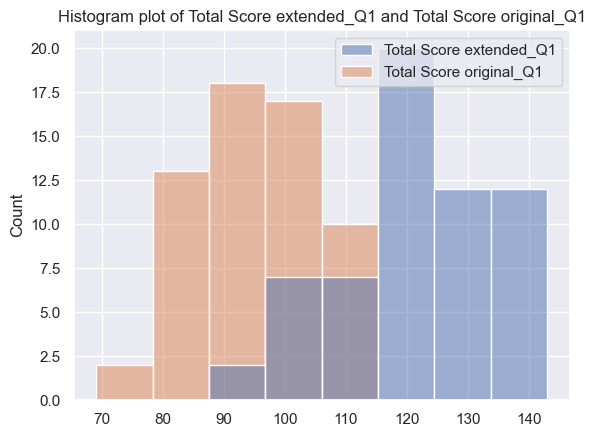

In [39]:
# Histogram plot to compare the distribution of 'Total Score extended_Q1' and 'Total Score original_Q1'
sns.histplot(data = Target[['Total Score extended_Q1', 'Total Score original_Q1']])
plt.title('Histogram plot of Total Score extended_Q1 and Total Score original_Q1')
plt.show()

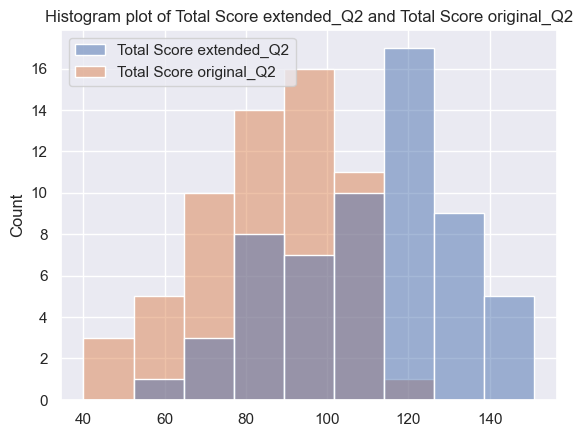

In [40]:
# HIstogram plot to compare the distribution of 'Total Score extended_Q2' and 'Total Score original_Q2'
sns.histplot(data = Target[['Total Score extended_Q2', 'Total Score original_Q2']])
plt.title('Histogram plot of Total Score extended_Q2 and Total Score original_Q2')
plt.show()